In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, precision_score


In [2]:
file = pd.read_csv('heart_failure.csv')
file.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
file.shape

(299, 13)

In [8]:
file['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = file.drop('DEATH_EVENT', axis=1)
y = file['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = dt_classifier.feature_importances_

# Pair feature names with their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort features based on importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display the sorted features and their importance scores
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

time: 0.5103705648313595
serum_creatinine: 0.13466087255363712
creatinine_phosphokinase: 0.09667832853326631
platelets: 0.06623807959324507
serum_sodium: 0.05815835182032365
anaemia: 0.047420634920634926
ejection_fraction: 0.04217520376482557
age: 0.022730018101440194
sex: 0.015743269138641377
diabetes: 0.005824676742626285
high_blood_pressure: 0.0
smoking: 0.0


In [11]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [13]:
columns_to_drop = ["smoking", "anaemia", "sex", "high_blood_pressure", "diabetes", "ejection_fraction", "platelets"]
file.drop(columns=columns_to_drop, inplace=True)
file.isnull().sum()

age                         0
creatinine_phosphokinase    0
serum_creatinine            0
serum_sodium                0
time                        0
DEATH_EVENT                 0
dtype: int64

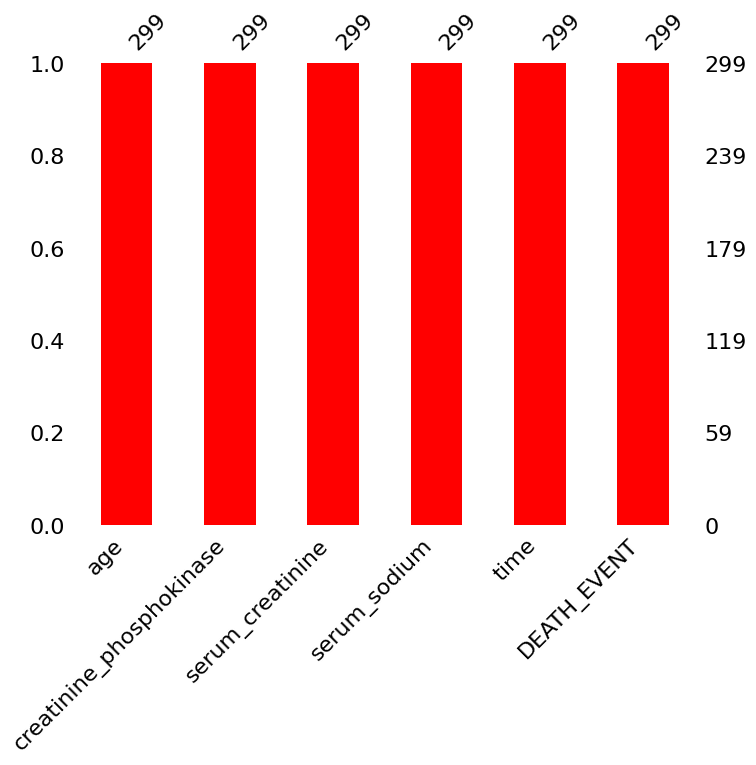

In [15]:
import missingno as msno
msno.bar(file, figsize =(8,6), color="red")
plt.show()

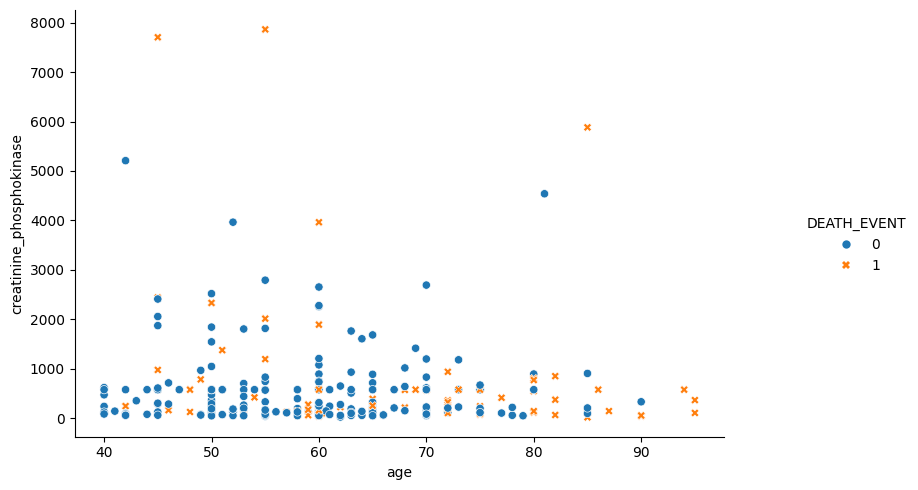

In [16]:
g=sns.relplot(x='age', y='creatinine_phosphokinase', data=file, hue='DEATH_EVENT', style='DEATH_EVENT')
g.fig.set_size_inches(10,5)
plt.show()

In [17]:
numeric_columns = file.select_dtypes(include=[float, int]).columns
file_numeric = file[numeric_columns]
correlation_matrix = file_numeric.corr()
print(correlation_matrix)


                               age  creatinine_phosphokinase  \
age                       1.000000                 -0.081584   
creatinine_phosphokinase -0.081584                  1.000000   
serum_creatinine          0.159187                 -0.016408   
serum_sodium             -0.045966                  0.059550   
time                     -0.224068                 -0.009346   
DEATH_EVENT               0.253729                  0.062728   

                          serum_creatinine  serum_sodium      time  \
age                               0.159187     -0.045966 -0.224068   
creatinine_phosphokinase         -0.016408      0.059550 -0.009346   
serum_creatinine                  1.000000     -0.189095 -0.149315   
serum_sodium                     -0.189095      1.000000  0.087640   
time                             -0.149315      0.087640  1.000000   
DEATH_EVENT                       0.294278     -0.195204 -0.526964   

                          DEATH_EVENT  
age                 

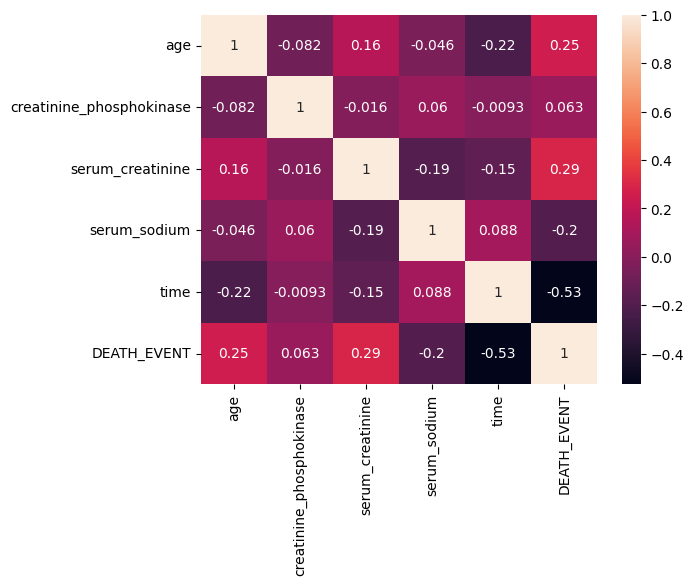

In [18]:
sns.heatmap(correlation_matrix, annot=True, color='pink')
plt.show()

In [19]:
x=file.drop('DEATH_EVENT', axis=1)
y= file['DEATH_EVENT']

In [20]:
x

,age,creatinine_phosphokinase,serum_creatinine,serum_sodium,time
0,75.0,582,1.9,130,4
1,55.0,7861,1.1,136,6
2,65.0,146,1.3,129,7
3,50.0,111,1.9,137,7
4,65.0,160,2.7,116,8
...,...,...,...,...,...
294,62.0,61,1.1,143,270
295,55.0,1820,1.2,139,271
296,45.0,2060,0.8,138,278
297,45.0,2413,1.4,140,280


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y= le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtyp

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
print('The shape of x_train is :{}'. format(x_train.shape))
print('The shape of x_test is :{}'. format(x_test.shape))
print('The shape of y_train is :{}'. format(y_train.shape))
print('The shape of y_test is :{}'. format(y_test.shape))

The shape of x_train is :(239, 5)
The shape of x_test is :(60, 5)
The shape of y_train is :(239,)
The shape of y_test is :(60,)


In [24]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
pred_train = model.predict(x_train)
cm = confusion_matrix(y_train, pred_train)
print('confusion matrix Decision Tree\n',cm)
print('')

print('Akurasi pada saat training:{}'. format(accuracy_score(y_train,pred_train)))

confusion matrix Decision Tree
 [[166   0]
 [  0  73]]

Akurasi pada saat training:1.0


In [26]:
pred_test= model.predict(x_test)
cm = confusion_matrix(y_test, pred_test)
accuracy = accuracy_score(y_test,pred_test)
precision = precision_score(y_test,pred_test, average='micro')
recall = recall_score(y_test,pred_test, average='micro')
f1 = f1_score(y_test,pred_test, average='micro')
print('confusion matrix DecisionTree\n',cm)
print('')

print('Akurasi pada test: %.3f' %accuracy)
print('recall: %.3f' %recall)
print('precision: %.3f' %precision)
print('f1: %.3f' %f1)

confusion matrix DecisionTree
 [[31  6]
 [ 7 16]]

Akurasi pada test: 0.783
recall: 0.783
precision: 0.783
f1: 0.783
